→ Scrapping time period:[01 June 2022 - 31 August 2022] 

→ Need to add comment to Notebook for clarity

In [1]:
import tweepy
import configparser
import json
import pandas as pd
import requests
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
import os


In [2]:
#Reading API token and secret
config = configparser.RawConfigParser()
config.read('config.ini')

['config.ini']

In [3]:
#Getting variable from config.ini file
api_key = config['twitter']['api_key']
api_key_secret = config['twitter']['api_key_secret']
access_token = config['twitter']['access_token']
access_token_secret = config['twitter']['access_token_secret']
bearer_token = config['twitter']['bearer_secret']

In [4]:
#Getting authetication
#OAuth is an open-standard Authorization protocol or framework that provides applications the ability for "secure designated access"
#OAuth doesn't share password data but instead uses authorizations tokens to prove an identitybetween consumers and providers
#OAuth is an authorizations protocal that allows you to approve one application interacting with another on behalf without giving away your password
auth = tweepy.OAuthHandler(api_key, api_key_secret)
auth.set_access_token(access_token, access_token_secret)

#Generating an instance of Client with access full archieve from Academic Access
client = tweepy.Client(bearer_token=bearer_token)

In [5]:
dates = pd.date_range(start='06/01/2022', end='09/01/2022')
data = pd.DataFrame(columns=list(range(0,24)),index=pd.date_range(start='06/01/2022', end='09/01/2022'))

In [6]:
# To set your environment variables in your terminal run the following line:
# export 'BEARER_TOKEN'='<your_bearer_token>'

search_url = "https://api.twitter.com/2/tweets/counts/all"

# Optional params: start_time,end_time,since_id,until_id,next_token,granularity
query_params = {'query': 'bitcoin OR #bitcoin -is:retweet' ,'granularity': 'minute', 'start_time': '2022-06-01T00:00:00Z', 'end_time': '2022-06-02T00:00:00Z'}


def bearer_oauth(r):
    """
    Method required by bearer token authentication.
    """

    r.headers["Authorization"] = f"Bearer {bearer_token}"
    r.headers["User-Agent"] = "v2FullArchiveTweetCountsPython"
    return r


def connect_to_endpoint(url, params):
    response = requests.request("GET", search_url, auth=bearer_oauth, params=params)
    #print(response.status_code)
    if response.status_code != 200:
        raise Exception(response.status_code, response.text)
    return response.json()

#json_response = connect_to_endpoint(search_url, query_params)
#json_response['data']


In [7]:
data

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
2022-06-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-06-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-06-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-06-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-06-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-08-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-08-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
#for i in range(len(data)-1):
for i in range(len(data)-1):

    search_url = "https://api.twitter.com/2/tweets/counts/all"
    start_time = '{}Z'.format(dates[i].isoformat())
    end_time = '{}Z'.format(dates[i+1].isoformat())

    query_params = {'query': 'bitcoin OR #bitcoin -is:retweet' ,'granularity': 'hour', 'start_time': start_time, 'end_time': end_time}
    json_response = connect_to_endpoint(search_url, query_params)
    #print(len(list(enumerate(json_response['data']))))
    for item in list(enumerate(json_response['data'])):
        #print(item[0],item[1]['tweet_count'])
        data[item[0]][i] = item[1]['tweet_count']
        #print(item[1]['start'])
        #print(item[1]['end'])



In [9]:
data

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
2022-06-01,6157,6000,6485,8201,7601,7650,8002,8535,8025,8484,...,12480,11710,11649,11768,11902,12129,11166,9013,8026,6617
2022-06-02,6481,7856,6928,9021,8298,7895,8227,8964,9017,9305,...,12605,11658,10867,11890,10093,9849,9459,8305,7251,6732
2022-06-03,6583,6980,7017,8316,8093,7436,8796,9693,9479,9487,...,12698,11615,12812,11325,10863,10184,8778,8306,6848,6114
2022-06-04,6107,6213,6237,7763,6957,6418,7185,7972,7126,8372,...,9806,9721,9176,8623,7256,6977,6812,6214,5733,4758
2022-06-05,4518,4651,4582,6066,5360,5653,6607,7074,7585,7267,...,12466,12631,12920,11536,11487,10325,8796,7968,7049,6743
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-28,5627,5727,5819,7658,5959,5771,6217,7332,7115,8119,...,10313,9971,9727,9100,8741,8477,8210,7578,6817,7505
2022-08-29,7386,6253,6518,7421,5947,6302,7721,9837,8641,9706,...,13896,12427,11317,10004,11826,10311,8921,7644,6661,6027
2022-08-30,5745,5497,6335,8022,7461,6541,7540,8521,7698,8795,...,12506,11589,11701,11446,10087,9676,8810,7130,6561,6194
2022-08-31,6642,6418,7590,8270,6317,6338,6935,8617,8823,10828,...,11858,10483,10706,9845,10400,9016,8258,7653,6944,5932


In [60]:
start_date = pd.to_datetime('2022-06-01')
end_date = pd.to_datetime('2022-07-14')
index = pd.date_range(start=start_date, end=end_date,freq='H')[:-1]

data_long = data[(data.index >= '2022-06-01') & (data.index <= '2022-07-13')].copy()
hourly_data = pd.Series()
for i in range(data_long.shape[0]):
    row = data_long.iloc[i]
    hourly_data = pd.concat([hourly_data,row],axis=0,ignore_index=True)

hourly_data = pd.DataFrame(hourly_data,columns=['Count'])
hourly_data.index = index
hourly_data

/var/folders/zm/bf3yd8d526x62v9mglx0hpqw0000gn/T/ipykernel_53966/1591387498.py:6: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  hourly_data = pd.Series()


,Count
2022-06-01 00:00:00,6194
2022-06-01 01:00:00,5991
2022-06-01 02:00:00,6458
2022-06-01 03:00:00,8221
2022-06-01 04:00:00,7626
...,...
2022-07-13 19:00:00,10502
2022-07-13 20:00:00,9748
2022-07-13 21:00:00,8324
2022-07-13 22:00:00,7300


In [48]:
hourly_data.to_excel('Datasets/btc-bitinfocharts_long.xlsx')

In [30]:
pd.concat([data_long.iloc[0],data_long.iloc[1]],axis=0)

0      6194
1      5991
2      6458
3      8221
4      7626
5      7660
6      8028
7      8556
8      8056
9      8519
10     9375
11     9334
12    11615
13    12030
14    12448
15    11700
16    11592
17    11733
18    11916
19    12102
20    11144
21     9024
22     8054
23     6614
0      6497
1      7867
2      6940
3      9055
4      8320
5      7912
6      8257
7      8994
8      9062
9      9333
10     9171
11    11108
12    12527
13    12947
14    12651
15    11758
16    10917
17    11947
18    10149
19     9909
20     9505
21     8363
22     7376
23     6887
dtype: object

In [11]:
plot_data = data[(data.index >= '2022-06-01') & (data.index <= '2022-07-13')]

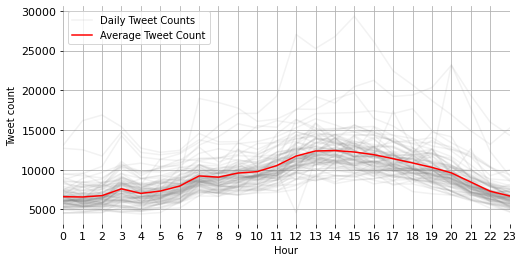

In [79]:
fig, ax = plt.subplots()

ax.plot(data.T,alpha = 0.1,c='grey')
ax.plot(data.iloc[0].T,alpha = 0.1,c='grey',label='Daily Tweet Counts')
ax.plot(data.mean().T,label='Average Tweet Count',c='red')
ax.grid()
ax.set_xticks(np.arange(0,24))
ax.tick_params(axis='x', labelsize=11)
ax.tick_params(axis='y', labelsize=11)
ax.set_xlim(xmin=0)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_xlabel('Hour')
ax.set_ylabel('Tweet count')
ax.set_xlim(xmax=23)
ax.legend()

plt.rcParams['figure.figsize'] = [8, 4]
#plt.show()
plt.savefig('../Write-Up/CHAPTER_5/tweet_count_python.png', format='png',dpi=900)

plt.show()

<BarContainer object of 24 artists>

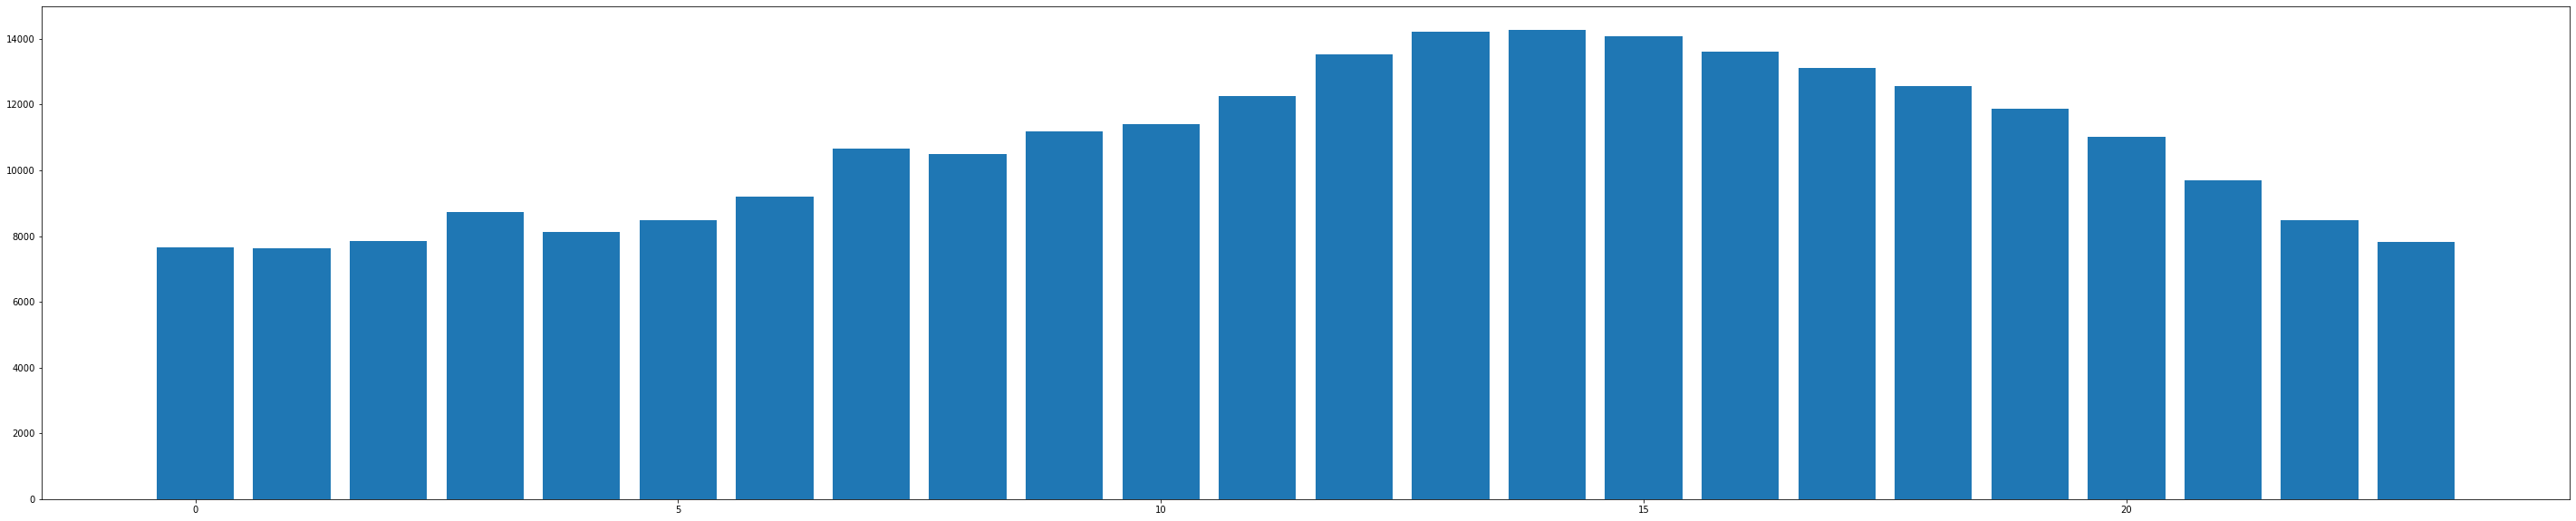

In [230]:
plt.bar(x=data.columns,height=data.mean().values)

In [194]:
data_min = pd.DataFrame(columns=list(range(0,1440)),index=pd.date_range(start='06/01/2022', end='09/01/2022'))

In [195]:
#for i in range(len(data_min)-1):
for i in range(len(data_min)-1):

    search_url = "https://api.twitter.com/2/tweets/counts/all"
    start_time = '{}Z'.format(dates[i].isoformat())
    end_time = '{}Z'.format(dates[i+1].isoformat())

    query_params = {'query': 'bitcoin OR #bitcoin -is:retweet' ,'granularity': 'minute', 'start_time': start_time, 'end_time': end_time}
    json_response = connect_to_endpoint(search_url, query_params)
    #print(len(list(enumerate(json_response['data']))))
    for item in list(enumerate(json_response['data'])):
        #print(item[0],item[1]['tweet_count'])
        data_min[item[0]][i] = item[1]['tweet_count']
        #print(item[1]['start'])
        #print(item[1]['end'])


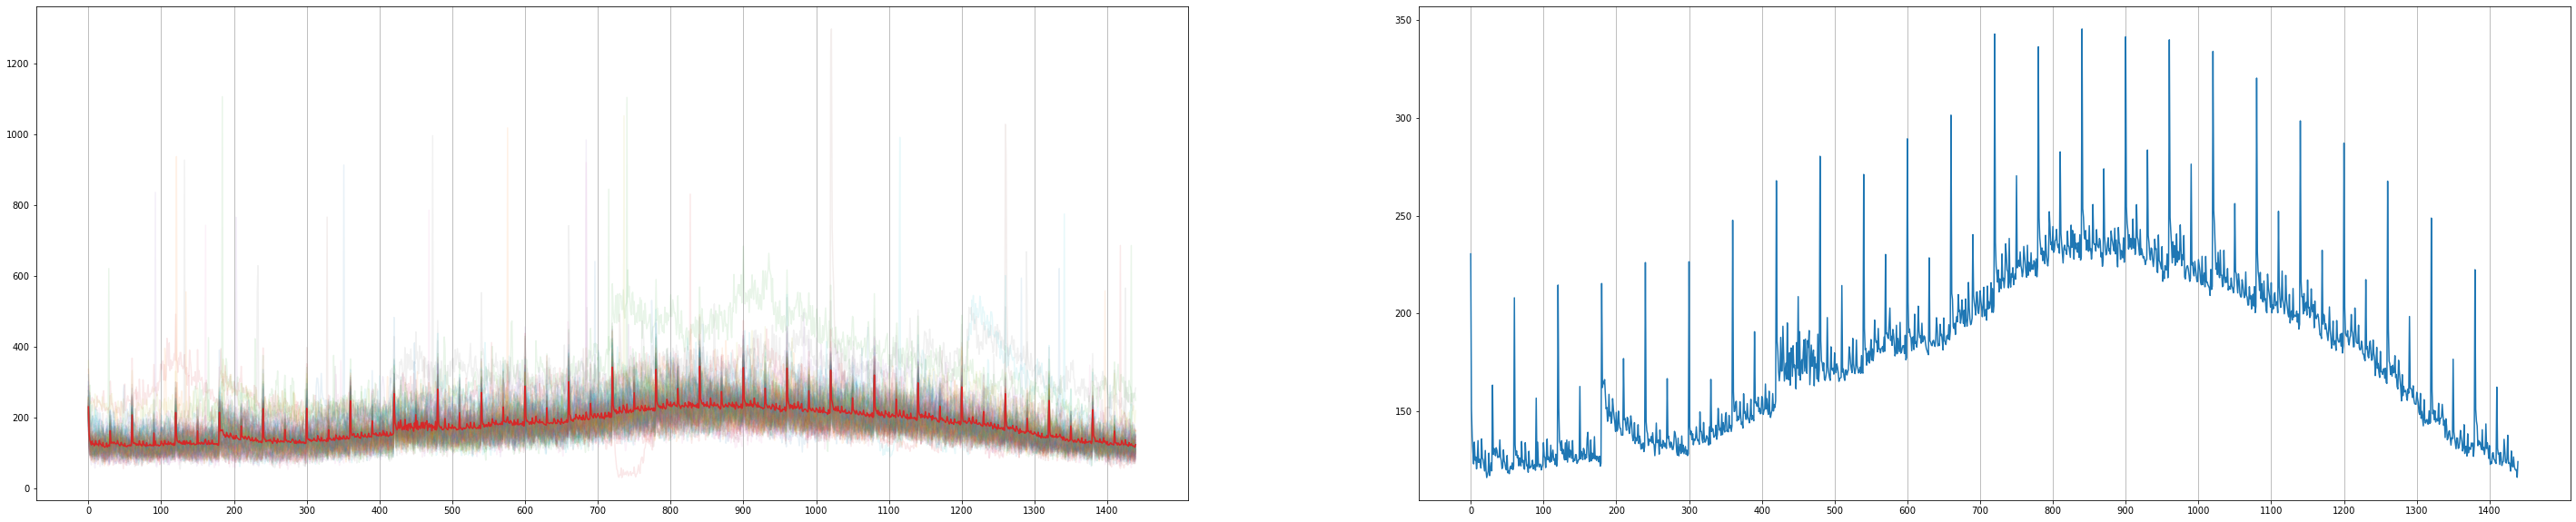

In [197]:
fig, axs = plt.subplots(1,2)

axs[0].plot(data_min.T,alpha = 0.1)
axs[0].plot(data_min.mean().T)
axs[0].grid(axis='x')
axs[0].set_xticks(np.arange(0,1440,100))
axs[1].plot(data_min.mean().T)
axs[1].grid(axis='x')
axs[1].set_xticks(np.arange(0,1440,100))
plt.rcParams['figure.figsize'] = [50, 10]

<BarContainer object of 1440 artists>

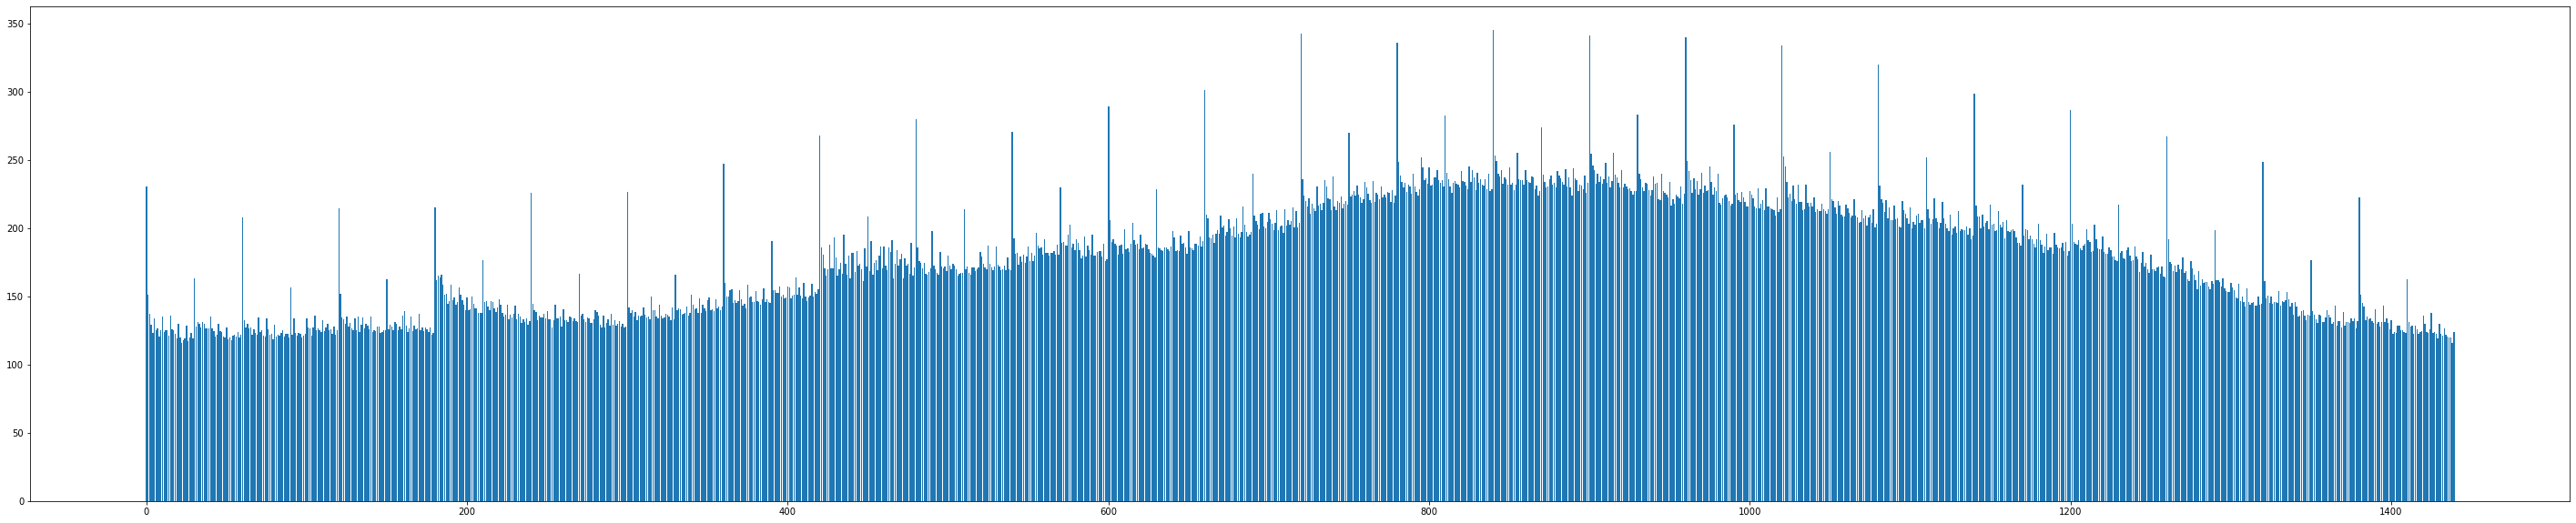

In [198]:
plt.bar(x=data_min.columns,height=data_min.mean().values)

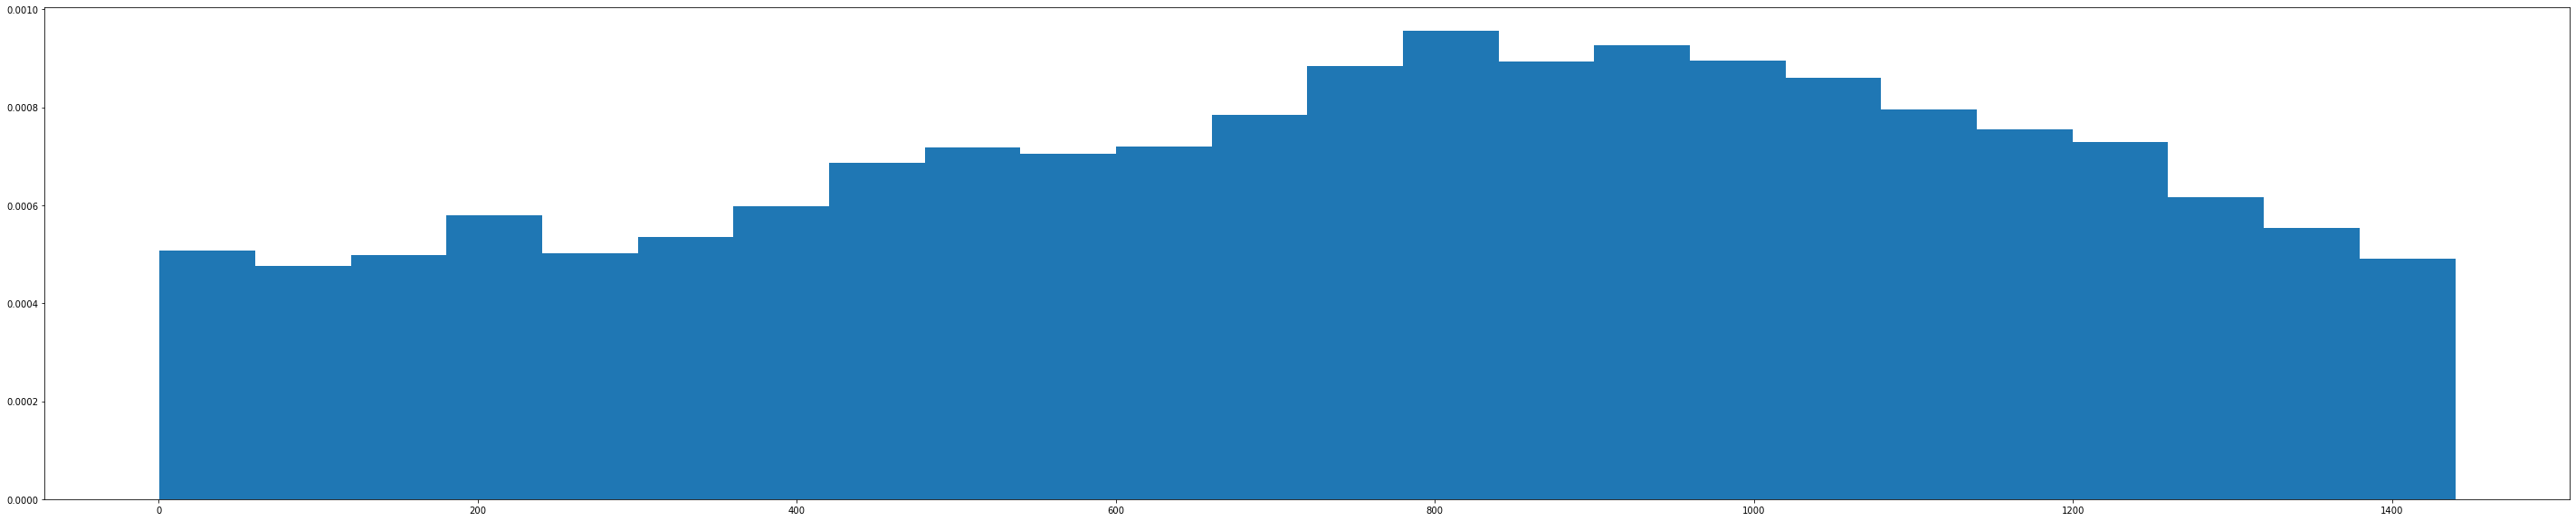

In [404]:
p = data_min.sum(axis=0)/(sum(data_min.sum(axis=0)))
Y = np.arange(0,1440,1)
n = 21600

def drv (p,Y,n):
    F = p.cumsum()
    X = np.zeros(n)
    U = np.random.random(n)
    for i in range(n):
        #print(Y[U[i] <= F])
        X[i] = Y[U[i] <= F][0]
    return X

X = drv(p,Y,n)

H = plt.hist(X, bins=24,density= True,range =(0.5,1439.5))
#H = plt.yticks(np.arange(0,0.4,0.02))
#H = plt.grid('Y')

In [405]:
X

array([ 410.,   30.,  689., ...,  933., 1226.,  843.])

In [406]:
my_dict = {i:list(X).count(i) for i in X}


In [416]:
np.min(list(my_dict.values()))

3

In [403]:
my_dict

{562.0: 4,
 1066.0: 3,
 767.0: 4,
 871.0: 3,
 800.0: 3,
 569.0: 4,
 194.0: 3,
 1353.0: 7,
 182.0: 8,
 468.0: 6,
 491.0: 3,
 589.0: 1,
 1070.0: 5,
 777.0: 8,
 588.0: 5,
 548.0: 14,
 907.0: 5,
 1283.0: 6,
 18.0: 3,
 864.0: 9,
 192.0: 2,
 976.0: 4,
 794.0: 6,
 591.0: 6,
 1186.0: 7,
 1110.0: 4,
 779.0: 3,
 397.0: 5,
 687.0: 3,
 1132.0: 3,
 104.0: 4,
 1024.0: 6,
 1237.0: 7,
 544.0: 3,
 406.0: 4,
 372.0: 3,
 989.0: 4,
 93.0: 5,
 1254.0: 2,
 1261.0: 2,
 1340.0: 3,
 1072.0: 6,
 238.0: 2,
 828.0: 4,
 450.0: 2,
 1194.0: 3,
 728.0: 7,
 33.0: 3,
 748.0: 6,
 1305.0: 2,
 1055.0: 5,
 893.0: 10,
 931.0: 7,
 751.0: 6,
 1054.0: 4,
 1325.0: 5,
 168.0: 3,
 67.0: 2,
 613.0: 3,
 1086.0: 8,
 533.0: 7,
 954.0: 7,
 64.0: 3,
 1127.0: 4,
 926.0: 2,
 754.0: 5,
 867.0: 7,
 316.0: 4,
 1120.0: 4,
 918.0: 5,
 901.0: 8,
 1434.0: 2,
 246.0: 2,
 60.0: 5,
 276.0: 4,
 1142.0: 6,
 237.0: 4,
 820.0: 3,
 711.0: 2,
 554.0: 2,
 740.0: 6,
 686.0: 4,
 1381.0: 1,
 1253.0: 5,
 442.0: 4,
 1428.0: 6,
 1050.0: 7,
 157.0: 3,
 584.0: 6

In [363]:
count = pd.DataFrame(columns=['Count'],index=range(1440))
count

,Count
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
1435,NaN
1436,NaN
1437,NaN
1438,NaN


In [370]:
from datetime import datetime


for i in range(1440):
    count['Count'][i]= my_dict[i]

count.to_csv('count_{}.csv'.format(datetime.datetime.now()),index=False)



In [388]:
for item in range(5,10):
    print(item)

5
6
7
8
9


In [1]:
os.listdir()

['.DS_Store',
 'Data Source - Bitinfocharts.ipynb',
 'Data Source - Twitter (Tweets).ipynb',
 'Datasets',
 'Data Scrubbing - Twitter feeds.ipynb',
 'Udemy Course - The Complete Neural Network Bootcamp -Theory Applications',
 'count.csv',
 'config.ini',
 'Data Source - Twitter (Counts).ipynb',
 '.ipynb_checkpoints',
 '.git',
 'Data Source - Google Trends (2022.01.02 - 2022.04.03).ipynb']

<BarContainer object of 24 artists>

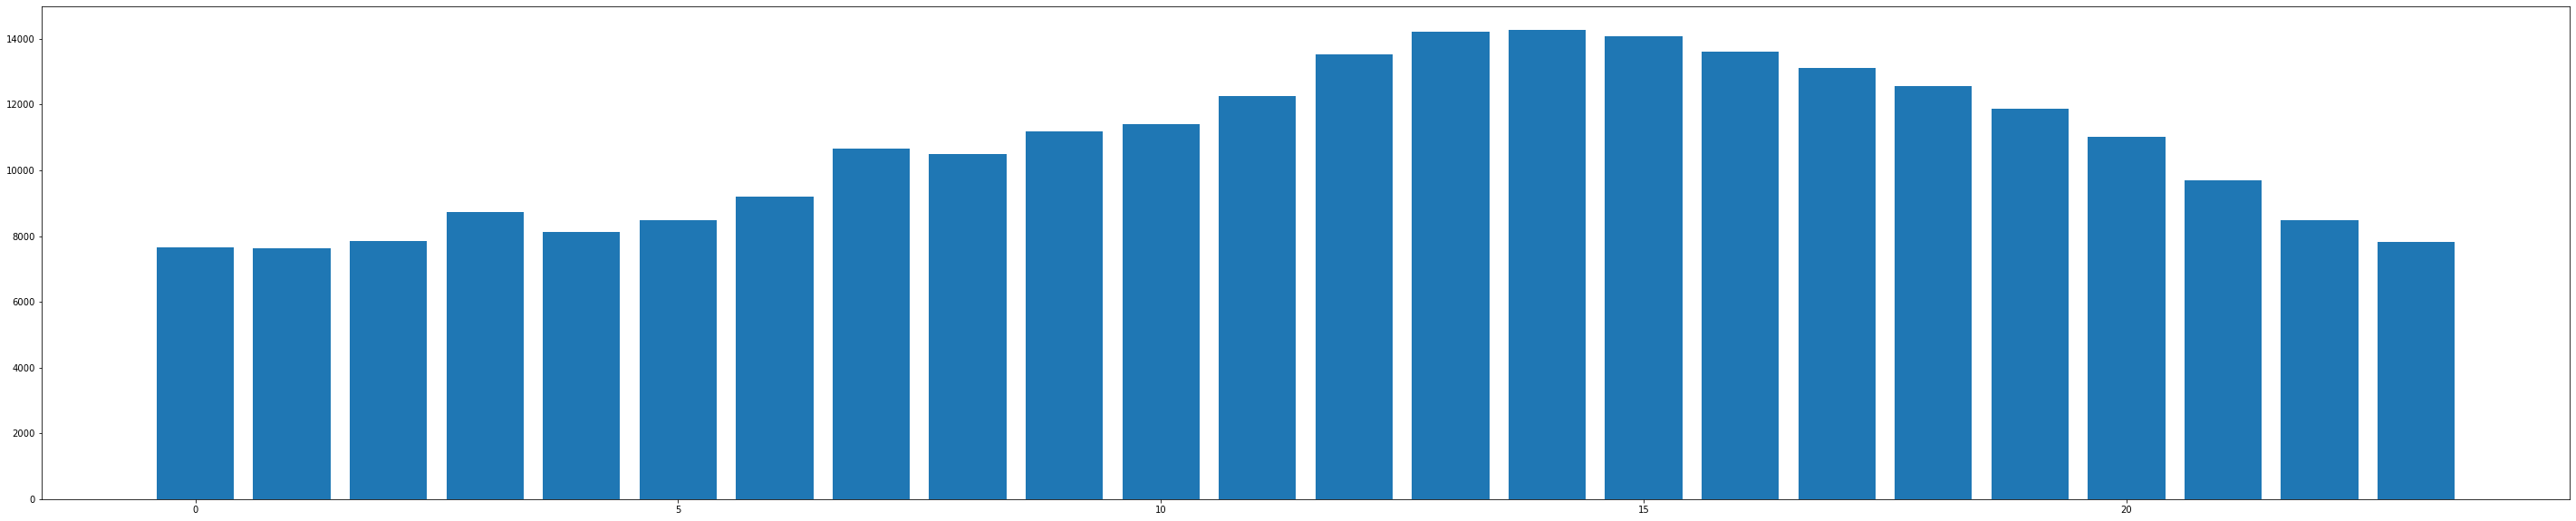

In [341]:
plt.bar(x=data.columns,height=data.mean().values)

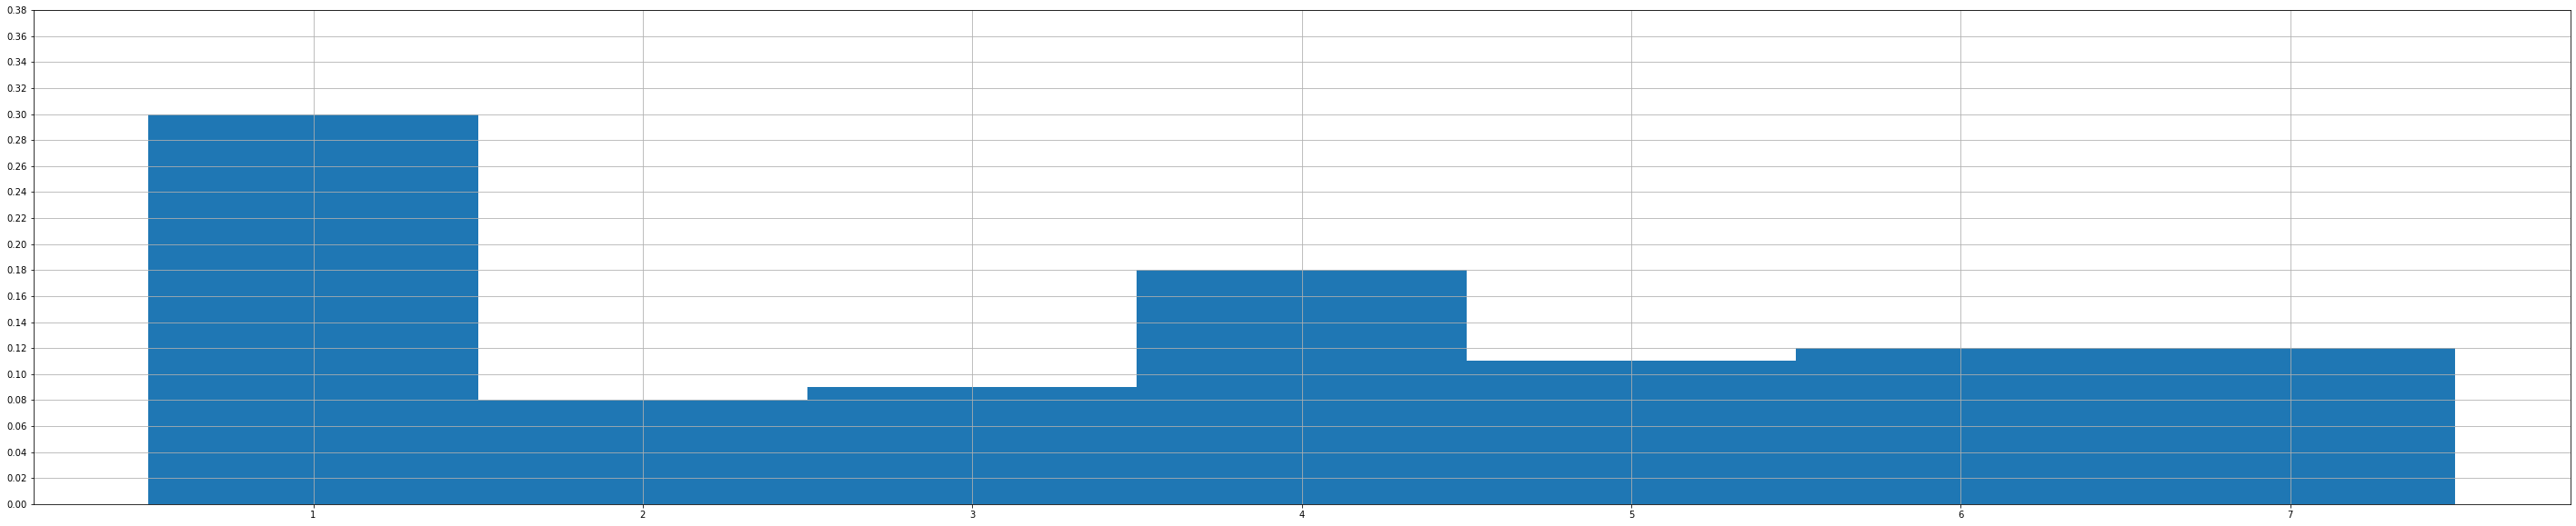

In [222]:
p = np.array([0.3,0.12,0.09,0.12,0.1,0.17,0.1]) #Set this probability distribution as the proportion of tweets per hour
Y = np.arange(1,8,1) #set this as all the minutes that can be drawn 1440
n = 100 #Sample number I want
def drv (p,Y,n):
    F = p.cumsum()
    X = np.zeros(n)
    U = np.random.random(n)
    for i in range(n):
        X[i] = Y[U[i] <= F][0]
    return X

X = drv(p,Y,n)

H = plt.hist(X, bins=7,density= True,range =(0.5,7.5))
H = plt.yticks(np.arange(0,0.4,0.02))
H = plt.grid('Y')